# Pi = f0**2

In [1]:
import numpy as np
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
from subprocess import call

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [43]:
# Polynomial
def f0_poly4_f0sqasPi(f0, pi1, pi2, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**4 + b f0**3 + c f0**2 + d f0 + e = 0
    a = l*(1-l)*(pi1+pi2)
    b = -(1-l)*(pi1*r1 + pi2*r2) - l**2
    c = l*(r1 + r2) + l**2
    d = -l*(r1+r2) - r1*r2
    e = r1*r2
    return a*f0**4 + b*f0**3 + c*f0**2 + d*f0 + e

def f0_poly4_deriv_f0sqasPi(f0, pi1, pi2, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = 4*l*(1-l)*(pi1+pi2)
    b = 3*(-(1-l)*(pi1*r1 + pi2*r2) - l**2)
    c = 2*((l*(r1 + r2) + l**2))
    d = -l*(r1+r2) - r1*r2
    return a*f0**3 + b*f0**2 +c*f0 + d

def f0poly_liml1(f0, q1, q2, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -1
    b = (r1+r2) + 1
    c = -r1 -r2 -r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 +c*f0**2 + d

def f0poly_liml0(f0, pi1, pi2, q1, q2, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -(pi1*r1 + pi2*r2)
    b = 0
    c = -r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 +c*f0**2 + d

def f_i(i, f0, pis, qs, l, mu):
    K, q0 = qs[-1], 1.0
    rs = [q0*(mu/K + (1-mu)/q) for q in qs]
    try:
        fi = pis[i-1]*(1-l)*f0**3/(rs[i-1]-l*f0)
    except ZeroDivisionError:
        fi = float('nan') 
    # return (1-l)*pis[i-1]/(rs[i-1]/f0-l)
    return fi

In [32]:
# f0vals = np.arange(0.0,1.001,0.001)
f0vals = np.arange(-1.0,1.001,0.001)
# f0vals = np.arange(-3.0,3.01,0.01)
# f0vals = np.arange(-100.0,100.1,0.1)
pi = 1.0
q = 2.0
l = 0.4
mu = 0.0
f0polyVals = f0_poly4_f0sqasPi(f0vals, pi, pi, q, q, l, mu)
# f0polyDerivVals = f0_poly4_deriv_f0sqasPi(f0vals, pi, pi, q, q, l, mu)
# f0polyVals_l1 = f0poly_liml1(f0vals, q, q, mu)
# f0polyVals_l0 = f0poly_liml0(f0vals, pi, pi, q, q, mu)

[None]

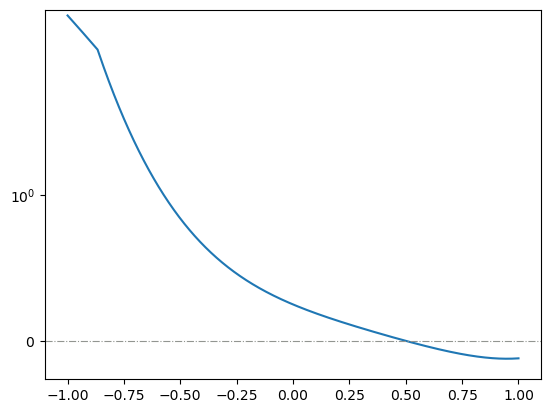

In [33]:
fig, ax = plt.subplots()
ax.plot(f0vals, f0polyVals)
# ax.plot(f0vals, f0polyDerivVals)
# ax.plot(f0vals, f0polyVals_l0)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
ax.set(yscale='symlog') # ylim=(-0.001, 0.001)
# ax.set_xlim(0.1,0.2)
# ax.axvline(0.16340442495333016)

In [31]:
sol1 = fsolve(f0_poly4_f0sqasPi, 0.1, args=(pi, pi, q, q, l, mu))
print(sol1[0])

sol2 = fsolve(f0_poly4_f0sqasPi, 0.25, args=(pi, pi, q, q, l, mu))
print(sol2[0])

sol3 = fsolve(f0_poly4_f0sqasPi, 1.5, args=(pi, pi, q, q, l, mu))
print(sol3[0])

sol4 = fsolve(f0_poly4_f0sqasPi, -1000, args=(pi, pi, q, q, l, mu))
print(sol4[0])

0.5
0.49999999999999845
0.833333333333349
0.49999999999999967


In [112]:
sol = fsolve(f0_poly4_deriv_f0sqasPi, 0.16, args=(pi, pi, q, q, l, mu))
print(sol[0])

0.16340442495333016


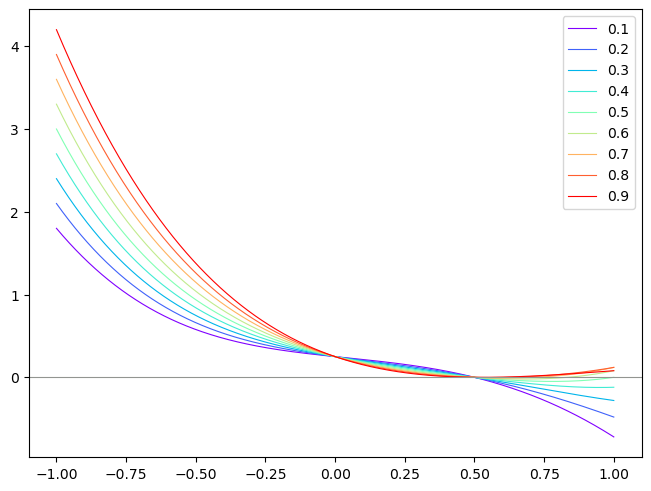

In [45]:
f0vals = np.arange(-1.0,1.001,0.001)
pi = 1.0
q = 2.0
mu = 0.0
ls = np.arange(0.1,1.0,0.1)
ls = np.around(ls,1)

fig, ax = plt.subplots(constrained_layout=True)
colors = plt.cm.rainbow(np.linspace(0,1,len(ls)))
for i,l in enumerate(ls):
    f0polyVals = f0_poly4_f0sqasPi(f0vals, pi, pi, q, q, l, mu)
    ax.plot(f0vals, f0polyVals, color=colors[i],lw=0.8, label=l)

ax.legend()
ax.axhline(0.0, color='xkcd:gray', lw=0.8)


In [46]:
for l in ls:
    print(l)
    sol1 = fsolve(f0_poly4_f0sqasPi, 0.1, args=(pi, pi, q, q, l, mu))
    print(sol1[0], f_i(1, sol1[0], (pi, pi), (q, q), l, mu), f_i(2, sol1[0], (pi, pi), (q, q), l, mu))
    sol2 = fsolve(f0_poly4_f0sqasPi, 0.9, args=(pi, pi, q, q, l, mu))
    print(sol2[0], f_i(1, sol2[0], (pi, pi), (q, q), l, mu), f_i(2, sol2[0], (pi, pi), (q, q), l, mu))
    print('-------------')

0.1
0.49999999999999223 0.2499999999999879 0.2499999999999879
0.5000000000000006 0.2500000000000009 0.2500000000000009
-------------
0.2
0.5 0.25 0.25
0.5 0.25 0.25
-------------
0.3
0.49999999999999994 0.2499999999999999 0.2499999999999999
0.4999999999999901 0.24999999999998304 0.24999999999998304
-------------
0.4
0.5 0.25 0.25
0.5000000000000007 0.2500000000000013 0.2500000000000013
-------------
0.5
0.4999999999999999 0.24999999999999978 0.24999999999999978
1.0000000000000018 -562949953421315.0 -562949953421315.0
-------------
0.6
0.5 0.25 0.25
0.8333333333333357 -160384602114335.28 -160384602114335.28
-------------
0.7
0.49999999999999994 0.2499999999999998 0.2499999999999998
0.7142857142857134 164125350851693.88 164125350851693.88
-------------
0.8
0.4999999999999985 0.2499999999999947 0.2499999999999947
0.6250000000000001 -439804651110400.1 -439804651110400.1
-------------
0.9
0.5000000000000026 0.2500000000000152 0.2500000000000152
0.555555555555555 38611107916413.6 38611107916

In [48]:
pi = 1.0
q1, q2 = 9.0, 10.0
l, mu = 0.6, 0.0
sol1 = fsolve(f0_poly4_f0sqasPi, 0.1, args=(pi, pi, q1, q2, l, mu))
print(sol1[0], f_i(1, sol1[0], (pi, pi), (q1, q2), l, mu), f_i(2, sol1[0], (pi, pi), (q1, q2), l, mu))

0.16262929282706926 0.1271291221638797 0.7102415850091716
